In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, silhouette_score
)
from sklearn.cluster import KMeans, DBSCAN
import joblib

In [2]:
# Load dataset
data = pd.read_csv('vocal_gender_features_new.csv')

In [3]:
data

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,1879.614568,1092.394432,1802.821290,479.751352,19.930251,0.017547,3882.812500,0.116425,0.088527,1458.0010,...,12.486454,-4.034742,13.771613,-5.278946,14.380637,5.627317,9.196584,-7.411221,12.621205,1
16144,1810.603695,1124.628905,1829.785209,491.274993,19.115077,0.017356,3816.685268,0.110338,0.067830,1538.0670,...,12.727633,-2.590058,15.919325,-6.724170,14.858981,6.610045,8.266881,-6.264262,13.771297,1
16145,1820.216958,1197.520780,1770.716715,509.906085,19.506173,0.015819,3728.759766,0.105142,0.073135,1637.4955,...,12.606261,-0.207149,15.909226,-9.772965,18.003307,4.041325,9.128441,-3.483847,11.820591,1
16146,1636.619660,1055.832051,1747.968472,500.649272,19.118411,0.014007,3524.797712,0.094456,0.071088,1453.4177,...,11.453891,-2.735264,15.467333,-4.670631,12.668987,3.787537,8.726358,-7.397458,13.588392,1


In [4]:
data.fillna(data.mean(), inplace=True)

In [5]:
# Split the dataset into features and target variable
X = data.drop('label', axis=1)
y = data['label']

In [6]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [7]:
# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Save Scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [9]:
print("Dataset info :", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

In [10]:
print("Dataset Shape:", data.shape)

Dataset Shape: (16148, 44)


In [11]:
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
        mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
count            16148.000000           16148.000000             16148.000000   
mean              1709.269730            1027.564673              1584.195931   
std                315.558063             286.303662               126.360465   
min                719.559285             194.998983              1106.939002   
25%               1475.078509             829.195585              1503.301521   
50%               1703.038854            1048.531356              1583.959951   
75%               1921.202685            1233.451527              1665.806788   
max               3059.390150            1912.173446              2046.070801   

       std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
count            16148.000000            16148.000000            16148.000000   
mean               432.492328               20.395652                0.023086   
std  

In [12]:
print("\nData Types:\n", data.dtypes)


Data Types:
 mean_spectral_centroid     float64
std_spectral_centroid      float64
mean_spectral_bandwidth    float64
std_spectral_bandwidth     float64
mean_spectral_contrast     float64
mean_spectral_flatness     float64
mean_spectral_rolloff      float64
zero_crossing_rate         float64
rms_energy                 float64
mean_pitch                 float64
min_pitch                  float64
max_pitch                  float64
std_pitch                  float64
spectral_skew              float64
spectral_kurtosis          float64
energy_entropy             float64
log_energy                 float64
mfcc_1_mean                float64
mfcc_1_std                 float64
mfcc_2_mean                float64
mfcc_2_std                 float64
mfcc_3_mean                float64
mfcc_3_std                 float64
mfcc_4_mean                float64
mfcc_4_std                 float64
mfcc_5_mean                float64
mfcc_5_std                 float64
mfcc_6_mean                float64
mfcc_6

In [13]:
print("\nMissing Values:\n",data.isnull().sum())


Missing Values:
 mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean              

In [14]:
print("\nDuplicated Rows:", data.duplicated().sum())


Duplicated Rows: 1078


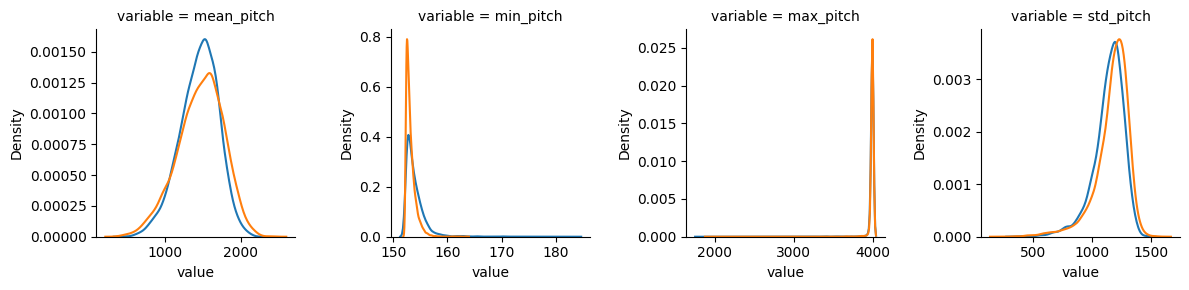

In [15]:
# KDE plots for pitch-related features
pitch_features = [col for col in data.columns if 'pitch' in col.lower()]
data[pitch_features + ['label']].melt(id_vars='label').pipe(
    lambda d: sns.FacetGrid(d, col="variable", hue="label", sharex=False, sharey=False).map(sns.kdeplot, "value")
)
plt.show()

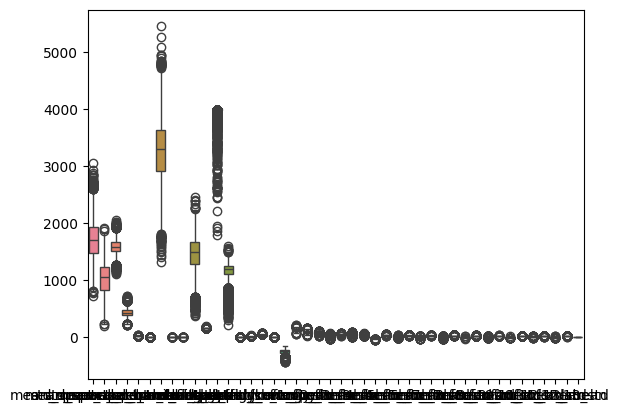

In [16]:
#Outliers present
sns.boxplot(data=data)
plt.show()

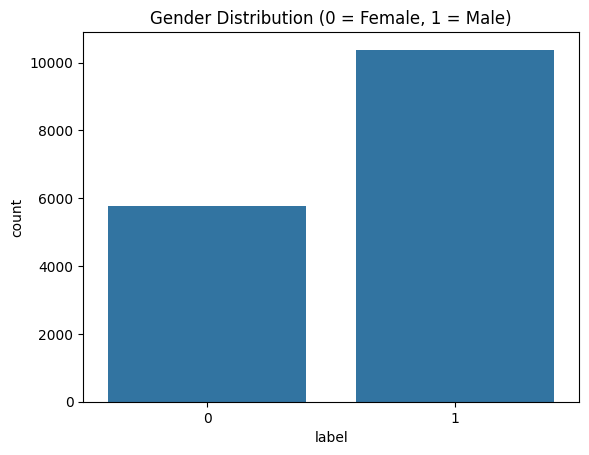

In [17]:
#Target Variable Distribution
sns.countplot(x='label', data=data)
plt.title("Gender Distribution (0 = Female, 1 = Male)")
plt.show()

In [18]:
data.mean()

mean_spectral_centroid     1709.269730
std_spectral_centroid      1027.564673
mean_spectral_bandwidth    1584.195931
std_spectral_bandwidth      432.492328
mean_spectral_contrast       20.395652
mean_spectral_flatness        0.023086
mean_spectral_rolloff      3281.808257
zero_crossing_rate            0.118088
rms_energy                    0.084759
mean_pitch                 1461.624198
min_pitch                   153.523952
max_pitch                  3981.378958
std_pitch                  1157.456009
spectral_skew                 1.580823
spectral_kurtosis             2.274629
energy_entropy               27.064486
log_energy                    2.078193
mfcc_1_mean                -255.680883
mfcc_1_std                  117.729843
mfcc_2_mean                  85.464600
mfcc_2_std                   54.923121
mfcc_3_mean                   4.418667
mfcc_3_std                   35.407470
mfcc_4_mean                  33.933538
mfcc_4_std                   29.955654
mfcc_5_mean              

In [19]:
data.median()

mean_spectral_centroid     1703.038854
std_spectral_centroid      1048.531356
mean_spectral_bandwidth    1583.959951
std_spectral_bandwidth      423.121818
mean_spectral_contrast       20.759579
mean_spectral_flatness        0.021737
mean_spectral_rolloff      3293.459741
zero_crossing_rate            0.116623
rms_energy                    0.083121
mean_pitch                 1484.461250
min_pitch                   153.108795
max_pitch                  3992.904300
std_pitch                  1182.625500
spectral_skew                 1.548530
spectral_kurtosis             1.767928
energy_entropy               26.290127
log_energy                    2.097212
mfcc_1_mean                -251.334425
mfcc_1_std                  115.146840
mfcc_2_mean                  84.193252
mfcc_2_std                   54.281097
mfcc_3_mean                   4.300252
mfcc_3_std                   35.020782
mfcc_4_mean                  33.753760
mfcc_4_std                   29.667253
mfcc_5_mean              

In [20]:
data.std()

mean_spectral_centroid     315.558063
std_spectral_centroid      286.303662
mean_spectral_bandwidth    126.360465
std_spectral_bandwidth      78.723202
mean_spectral_contrast       1.628596
mean_spectral_flatness       0.010027
mean_spectral_rolloff      526.824341
zero_crossing_rate           0.037707
rms_energy                   0.022814
mean_pitch                 287.763342
min_pitch                    1.447309
max_pitch                   83.832598
std_pitch                  140.447583
spectral_skew                0.485363
spectral_kurtosis            2.310902
energy_entropy               8.635122
log_energy                   0.387614
mfcc_1_mean                 37.105602
mfcc_1_std                  20.472597
mfcc_2_mean                 19.280055
mfcc_2_std                  10.908878
mfcc_3_mean                 12.588819
mfcc_3_std                   6.712895
mfcc_4_mean                  9.743931
mfcc_4_std                   5.079022
mfcc_5_mean                 11.183025
mfcc_5_std  

In [21]:
data.max()

mean_spectral_centroid     3059.390150
std_spectral_centroid      1912.173446
mean_spectral_bandwidth    2046.070801
std_spectral_bandwidth      724.361505
mean_spectral_contrast       24.907725
mean_spectral_flatness        0.072172
mean_spectral_rolloff      5451.099537
zero_crossing_rate            0.270710
rms_energy                    0.187577
mean_pitch                 2454.724000
min_pitch                   183.662500
max_pitch                  3996.093800
std_pitch                  1596.422400
spectral_skew                 4.415094
spectral_kurtosis            23.230940
energy_entropy               73.325320
log_energy                    3.350187
mfcc_1_mean                -162.769840
mfcc_1_std                  206.839600
mfcc_2_mean                 154.593230
mfcc_2_std                  109.794560
mfcc_3_mean                  58.032795
mfcc_3_std                   63.761032
mfcc_4_mean                  92.504860
mfcc_4_std                   59.218582
mfcc_5_mean              

In [22]:
data.min()

mean_spectral_centroid      719.559285
std_spectral_centroid       194.998983
mean_spectral_bandwidth    1106.939002
std_spectral_bandwidth      199.321584
mean_spectral_contrast       15.154801
mean_spectral_flatness        0.001816
mean_spectral_rolloff      1310.661765
zero_crossing_rate            0.027727
rms_energy                    0.022425
mean_pitch                  359.391170
min_pitch                   152.343750
max_pitch                  1794.782000
std_pitch                   204.092130
spectral_skew                -0.942690
spectral_kurtosis            -1.523384
energy_entropy                5.833234
log_energy                    0.352384
mfcc_1_mean                -448.921970
mfcc_1_std                   52.445877
mfcc_2_mean                   8.765240
mfcc_2_std                   19.014310
mfcc_3_mean                 -41.211006
mfcc_3_std                   15.303177
mfcc_4_mean                  -7.565544
mfcc_4_std                   12.005128
mfcc_5_mean              

In [23]:
#Variability within each variable
data.var()

mean_spectral_centroid      99576.890904
std_spectral_centroid       81969.786717
mean_spectral_bandwidth     15966.967180
std_spectral_bandwidth       6197.342464
mean_spectral_contrast          2.652326
mean_spectral_flatness          0.000101
mean_spectral_rolloff      277543.886284
zero_crossing_rate              0.001422
rms_energy                      0.000520
mean_pitch                  82807.740995
min_pitch                       2.094702
max_pitch                    7027.904429
std_pitch                   19725.523649
spectral_skew                   0.235577
spectral_kurtosis               5.340267
energy_entropy                 74.565330
log_energy                      0.150244
mfcc_1_mean                  1376.825680
mfcc_1_std                    419.127223
mfcc_2_mean                   371.720527
mfcc_2_std                    119.003629
mfcc_3_mean                   158.478370
mfcc_3_std                     45.062961
mfcc_4_mean                    94.944199
mfcc_4_std      

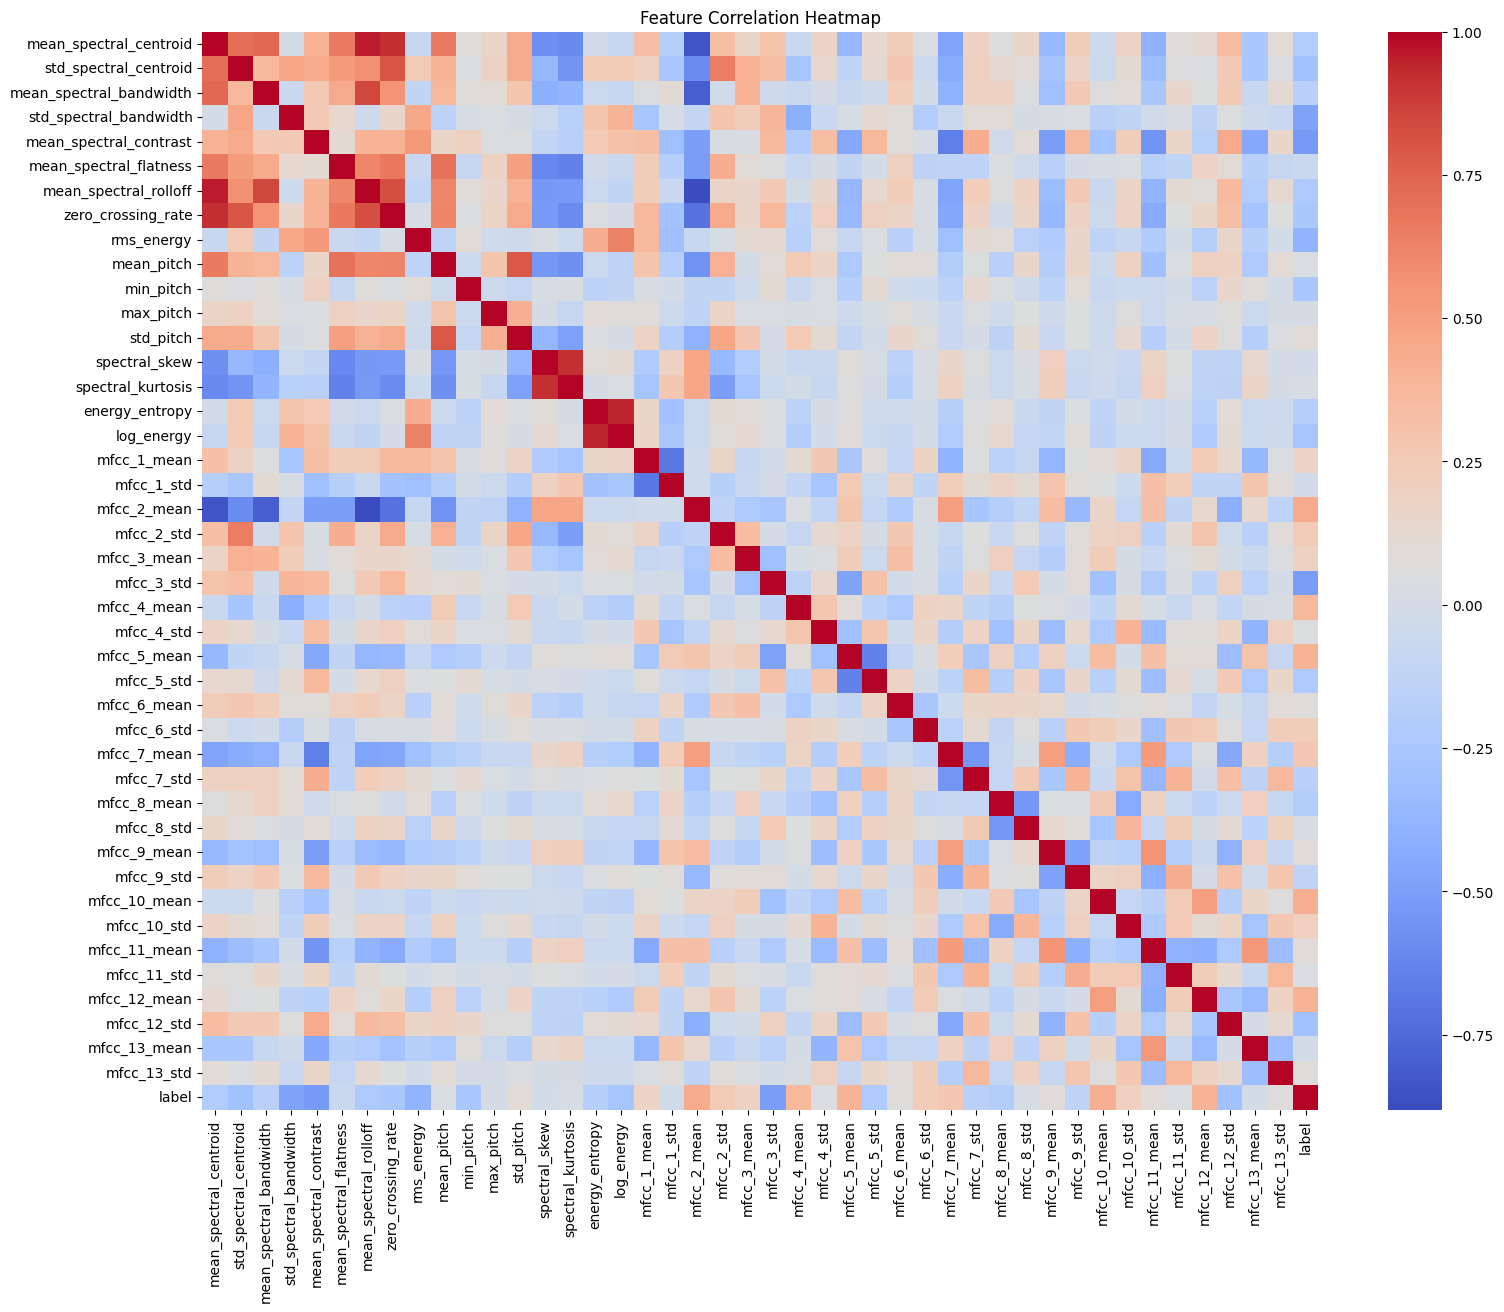

In [24]:
#Correlation between variables
corr = data.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
#Clustering (Unsupervised)
# K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_scaled)
kmeans_silhouette = silhouette_score(X_train_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.17315441181498828


In [26]:
# DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_scaled)

# Count number of clusters (excluding noise)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_noise = np.sum(dbscan_labels == -1)

# Compute Silhouette Score safely
if num_clusters > 1:
    core_mask = dbscan_labels != -1
    dbscan_silhouette = silhouette_score(X_train_scaled[core_mask], dbscan_labels[core_mask])
else:
    dbscan_silhouette = "Not enough clusters (or all noise)"

# Output
print(f"DBSCAN Clusters: {num_clusters}")
print(f"Noise Points: {num_noise}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")


DBSCAN Clusters: 0
Noise Points: 11303
DBSCAN Silhouette Score: Not enough clusters (or all noise)


In [27]:
# Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

In [28]:
# Classification Models
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Neural Network': MLPClassifier(max_iter=1000)
}


In [29]:
# Hyperparameter tuning
param_grid = {
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['tanh', 'relu']}
}


In [30]:
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5)
    grid_search.fit(X_train_scaled, y_train)
    best_models[model_name] = grid_search.best_estimator_


In [31]:
# Model Evaluation
for model_name, model in best_models.items():
    y_pred = model.predict(X_val_scaled)
    print(f"Model: {model_name}")
    print("Classification Report:\n", classification_report(y_val, y_pred))

    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("Accuracy:", accuracy_score(y_val, y_pred))

    average_type = 'binary' if len(set(y_val)) == 2 else 'weighted'

    print("Precision:", precision_score(y_val, y_pred, average=average_type))
    print("Recall:", recall_score(y_val, y_pred, average=average_type))
    print("F1 Score:", f1_score(y_val, y_pred, average=average_type))
    print("\n")

Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       830
           1       0.99      1.00      1.00      1592

    accuracy                           1.00      2422
   macro avg       1.00      0.99      0.99      2422
weighted avg       1.00      1.00      1.00      2422

Confusion Matrix:
 [[ 821    9]
 [   3 1589]]
Accuracy: 0.9950454170107349
Precision: 0.9943679599499374
Recall: 0.9981155778894473
F1 Score: 0.9962382445141066


Model: SVM
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       1.00      1.00      1.00      1592

    accuracy                           1.00      2422
   macro avg       1.00      1.00      1.00      2422
weighted avg       1.00      1.00      1.00      2422

Confusion Matrix:
 [[ 829    1]
 [   0 1592]]
Accuracy: 0.999587118084228
Precision: 0.9993722536095417

In [33]:
# Save best models
joblib.dump(best_models['Random Forest'], 'random_forest_model.pkl')
joblib.dump(best_models['SVM'], 'svm_model.pkl')
joblib.dump(best_models['Neural Network'], 'mlp_model.pkl')

['mlp_model.pkl']

In [34]:

print("✅ All best models and the scaler have been saved successfully.")

✅ All best models and the scaler have been saved successfully.
